# Wine quality analysis and prediction

Your task is to analyze the Wine quality dataset using techniques learned in the course and create a perceptron model to predict wine quality based on existing variables.

The notebook consists of two parts:

  1. Analyzing the data (summary statistics and graphical analysis)
  2. Creating a perceptron model.

### Data Description

The data we are using is modified [Wine Quality - Red Wine](https://archive.ics.uci.edu/ml/datasets/wine+quality) datasets taken from the UCI repository.

#### Red Wine Data

Information regarding data:
&emsp;&emsp;&emsp;&emsp;**Title:** Wine Quality<br>
&emsp;&emsp;&emsp;&emsp;**Number of Instances:** 1599<br>
&emsp;&emsp;&emsp;&emsp;**Number of Attributes:** 6<br>
&emsp;&emsp;&emsp;&emsp;**Attribute Information:**

    1. fixed acidity:           continuous
    2. volatile acidity:        continuous
    3. residual sugar:          continuous
    4. density:                 continuous
    5. alcohol:                 continuous
    6. quality:                 multi-valued discrete

### Variable Descriptions

Here is an explanation of each variable in the datasets:

1. **fixed acidity**: Refers to the non-volatile acids in wine such as tartaric acid. It contributes to the wine's tartness.
2. **volatile acidity**: Measures the amount of acetic acid in wine, which at high levels can lead to an unpleasant vinegar taste.
3. **residual sugar**: The amount of sugar remaining after fermentation stops. It is measured in grams per liter and affects the sweetness of wine.
4. **density**: The density of wine, close to the density of water. It can be influenced by the presence of sugars, alcohol, and other compounds.
5. **alcohol**: The alcohol content of the wine, usually measured as a percentage of volume.
6. **quality**: A score between 0 and 10 given by wine experts based on sensory data, representing the overall quality of the wine. Based on these scores, `bad wine` is assigned to wines with a score < 7 and `good wine` to wines with a score ≥ 7.


### Tasks

1. Load CSV data into a pandas DataFrame.
2. Explore data:
   * Specify which variables are numerical and which are categorical variables.
   * Calculate the number of unique values for each variable.
   * Detect missing values (`NaN` values).
   * Detect duplicated rows.
3. If there are any `NaN` values, filter them out.
4. If there are any duplicated rows, filter them out.


### Hints

1. A useful method for the description of data types is `.info()`.


In [1]:
# import all necessary libraries
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

We will first import the data into a pandas dataframe and inspect it's properties.

In [2]:
# Load the dataset from the
df = pd.read_csv('https://gist.githubusercontent.com/Ruzejjur/a6a086d0160172a14d72c67ac9490a3c/raw/f2d9848162b5491abbf35c5e3d448a41e87edf7b/wine_quality.csv')

# Display the first few rows of the dataset
df.head()

,fixed acidity,volatile acidity,residual sugar,density,alcohol,quality
0,7.4,0.70,1.9,0.9978,9.4,bad wine
1,7.8,0.88,2.6,0.9968,9.8,bad wine
2,7.8,0.76,2.3,0.9970,9.8,bad wine
3,11.2,0.28,1.9,0.9980,9.8,bad wine
4,7.4,0.70,1.9,0.9978,9.4,bad wine


In [3]:
# So now the data is in rectangular form with 1599 entries each having 6 distinct properties
df.shape

(1599, 6)

In [4]:
# Let's list all the columns
columns = list(df.columns)
columns

['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'density',
 'alcohol',
 'quality']

In [5]:
# We now describe the properties of this dataframe like column datatype etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     1599 non-null   float64
 1   volatile acidity  1599 non-null   float64
 2   residual sugar    1599 non-null   float64
 3   density           1599 non-null   float64
 4   alcohol           1599 non-null   float64
 5   quality           1599 non-null   object 
dtypes: float64(5), object(1)
memory usage: 75.1+ KB


We now make two distinct list for categorical and numerical column names as the analysis differ for both the types. For that we introspect the datatypes of each column and if it is of type `object` then it's categorical and else numerical.

In [6]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['quality']
numerical variables:  ['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'alcohol']


In [7]:
# Let's inspect how many unique values are there in each column.
df.nunique(axis=0)

fixed acidity        96
volatile acidity    143
residual sugar       91
density             436
alcohol              65
quality               2
dtype: int64

`quality` is a categorical variable.

In [8]:
# Cylinders and model_year also seems to be categorical so lets update the lists

print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['quality']
numerical variables:  ['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'alcohol']


Now inspect for `NaN`'s in data.



In [9]:
# Check for `nans` in each column
df.isna().sum()

fixed acidity       0
volatile acidity    0
residual sugar      0
density             0
alcohol             0
quality             0
dtype: int64

There are no `NaN` values.

Inspecting duplicated rows.

In [10]:
# Inspect total duplicate entries
print(f'total duplicate rows: {df.duplicated().sum()}')

# Drop duplicate rows if any (there are none so this opertaion does nothing)
df = df[~df.duplicated()]

total duplicate rows: 243


In [11]:
# Check shape of the data after filtering of duplicates
df.shape

(1356, 6)

In [12]:
# Displaing dataset for comparison with the output of the next code block
df.head()

,fixed acidity,volatile acidity,residual sugar,density,alcohol,quality
0,7.4,0.70,1.9,0.9978,9.4,bad wine
1,7.8,0.88,2.6,0.9968,9.8,bad wine
2,7.8,0.76,2.3,0.9970,9.8,bad wine
3,11.2,0.28,1.9,0.9980,9.8,bad wine
5,7.4,0.66,1.8,0.9978,9.4,bad wine


In [13]:
# Before we move ahead it's a good practice to group all variables together having same type
# (this just changes the ordering of columns)
df = pd.concat((df[cats], df[nums]), axis=1)
df.head()

,quality,fixed acidity,volatile acidity,residual sugar,density,alcohol
0,bad wine,7.4,0.70,1.9,0.9978,9.4
1,bad wine,7.8,0.88,2.6,0.9968,9.8
2,bad wine,7.8,0.76,2.3,0.9970,9.8
3,bad wine,11.2,0.28,1.9,0.9980,9.8
5,bad wine,7.4,0.66,1.8,0.9978,9.4


In [14]:
# Save the dimensions of the dataframe for later use
num_rows, num_cols = df.shape

Now we are ready for deeper analysis.

# Analysis of variables

Analyze the categorical and numerical variables separately.

## Analysis of categorical variables


### Tasks

1. Subset the dataset only for the categorical variables.
2. Explore unique values of these variables.
3. Calculate summary statistics for those categorical variables which are numeric:
   * min
   * max
   * mean
   * median
   * variance
   * standard deviation
4. Create graphical analysis of the categorical variables:
   * Create a count plot for each categorical variable (use `sns.countplot()`).
5. Describe the insights from the analysis:
   * Is the dataset balanced with respect to individual categories?


### Hints

1. A useful method for the summary statistics is `.describe()` from the pandas package.
2. We would like the data to be evenly represented across categories (i.e., uniformly distributed). Are the data uniformly distributed across the categories?


In [15]:
# Printing the categorical variables as a reminder of what is being examined
print(f'categorical variables:  {cats}')

categorical variables:  ['quality']


In [16]:
# Creating a copy of the dataset only with the categorical variables
df_cat = df['quality']
df_cat.head(10)

0      bad wine
1      bad wine
2      bad wine
3      bad wine
5      bad wine
6      bad wine
7     good wine
8     good wine
9      bad wine
10     bad wine
Name: quality, dtype: object

In [17]:
# Let's look at the unique categories in `quality`

print(f"categories in quality: {pd.unique(df_cat)}")

categories in quality: ['bad wine' 'good wine']


Summary statistics of categorical variable gives no insight (as the values are 0 and 1) so we are skipping this step.

### Graphical analysis

Now we analyse the distribution for each categorical variable and make some insights from the plots.

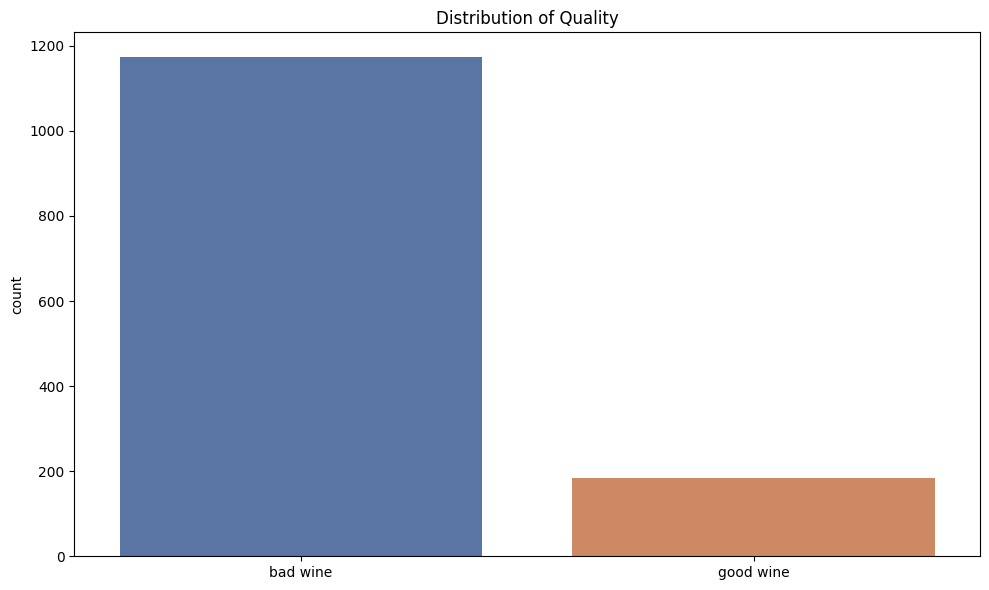

In [18]:
# Subsetting the quality dataframe
df_cat = df['quality']

# Set up the figure with a specified size
fig = plt.figure(1, (10, 6))

# Define a color palette for plots
palette = "deep"

# Create a count plot for the 'quality' column
ax = plt.subplot(1, 1, 1)
sns.countplot(data=df, x='quality', hue='quality', palette=palette, ax=ax)

# Remove the x-axis label for a cleaner look
ax.set_xlabel(None)

# Set the title for the plot
ax.set_title('Distribution of Quality')

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


In [19]:
# Calculate the total number of rows
num_rows = len(df_cat)

# Calculate value counts for the 'quality' column
val_counts = df_cat.value_counts()

# Get the most frequent value and calculate its proportion
dominant_frac = val_counts.iloc[0] / num_rows

# Print the proportion of the dominant class
print(f'For quality: `{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of quality')


For quality: `bad wine` alone contributes to 86.5% of quality


### Insights
* `quality` is highly imbalanced. 86.5% of the dataset consists of `bad wine`.


In [20]:
# Examine the dataframe as a reminder
df.head()

,quality,fixed acidity,volatile acidity,residual sugar,density,alcohol
0,bad wine,7.4,0.70,1.9,0.9978,9.4
1,bad wine,7.8,0.88,2.6,0.9968,9.8
2,bad wine,7.8,0.76,2.3,0.9970,9.8
3,bad wine,11.2,0.28,1.9,0.9980,9.8
5,bad wine,7.4,0.66,1.8,0.9978,9.4


## Analysis on Numerical Attributes

### Tasks

1. Subset the dataset only for the numerical variables.
2. Calculate summary statistics for these variables:
   * min
   * max
   * mean
   * median
   * variance
   * standard deviation
3. Create graphical analysis of the numeric variables:
   * Create one (or more) of the following plots for each numeric variable:
      * Histogram (`sns.histplot()`)
      * Box plot (`sns.boxplot()`)
      * Violin plot (`sns.violinplot()`)
4. Analyze the relationships between individual numerical variables:
   * Use `sns.pairplot()`.
5. Describe the insights from the analysis:
   * Describe the distribution of individual numeric variables.
   * Are there any relationships between the numeric variables?
     * For example: If the alcohol increases, does the fixed acidity increase/decrease?


### Hints

1. A useful method for the summary statistics is `.describe()` from the pandas package.


In [21]:
# Printing the numerical variables as a reminder of what is being examined
print(f'numerical variables:  {nums}')

numerical variables:  ['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'alcohol']


We will first slice out the numerical columns from original dataframe & then do analysis on it keeping the original data untouched, and at the end incorporate needed changes in our original dataframe.

In [22]:
df_num = df.loc[:, 'fixed acidity':]

Let's first look at some descriptive stats.



In [23]:
df_num.describe()

,fixed acidity,volatile acidity,residual sugar,density,alcohol
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,8.310103,0.529845,2.517183,0.996710,10.431649
std,1.737452,0.183050,1.342207,0.001868,1.081709
min,4.600000,0.120000,0.900000,0.990070,8.400000
25%,7.100000,0.390000,1.900000,0.995600,9.500000
50%,7.900000,0.520000,2.200000,0.996700,10.200000
75%,9.200000,0.640000,2.600000,0.997820,11.100000
max,15.900000,1.580000,15.500000,1.003690,14.900000


Possible meaningful difference between the mean and median of fixed acidity is observed. This could indicate that the data contain outliers. We will inspect this in graphical analysis section.


### Graphical analysis

Now we analyse the distribution for each numerical attribute and make some insights from the plots.

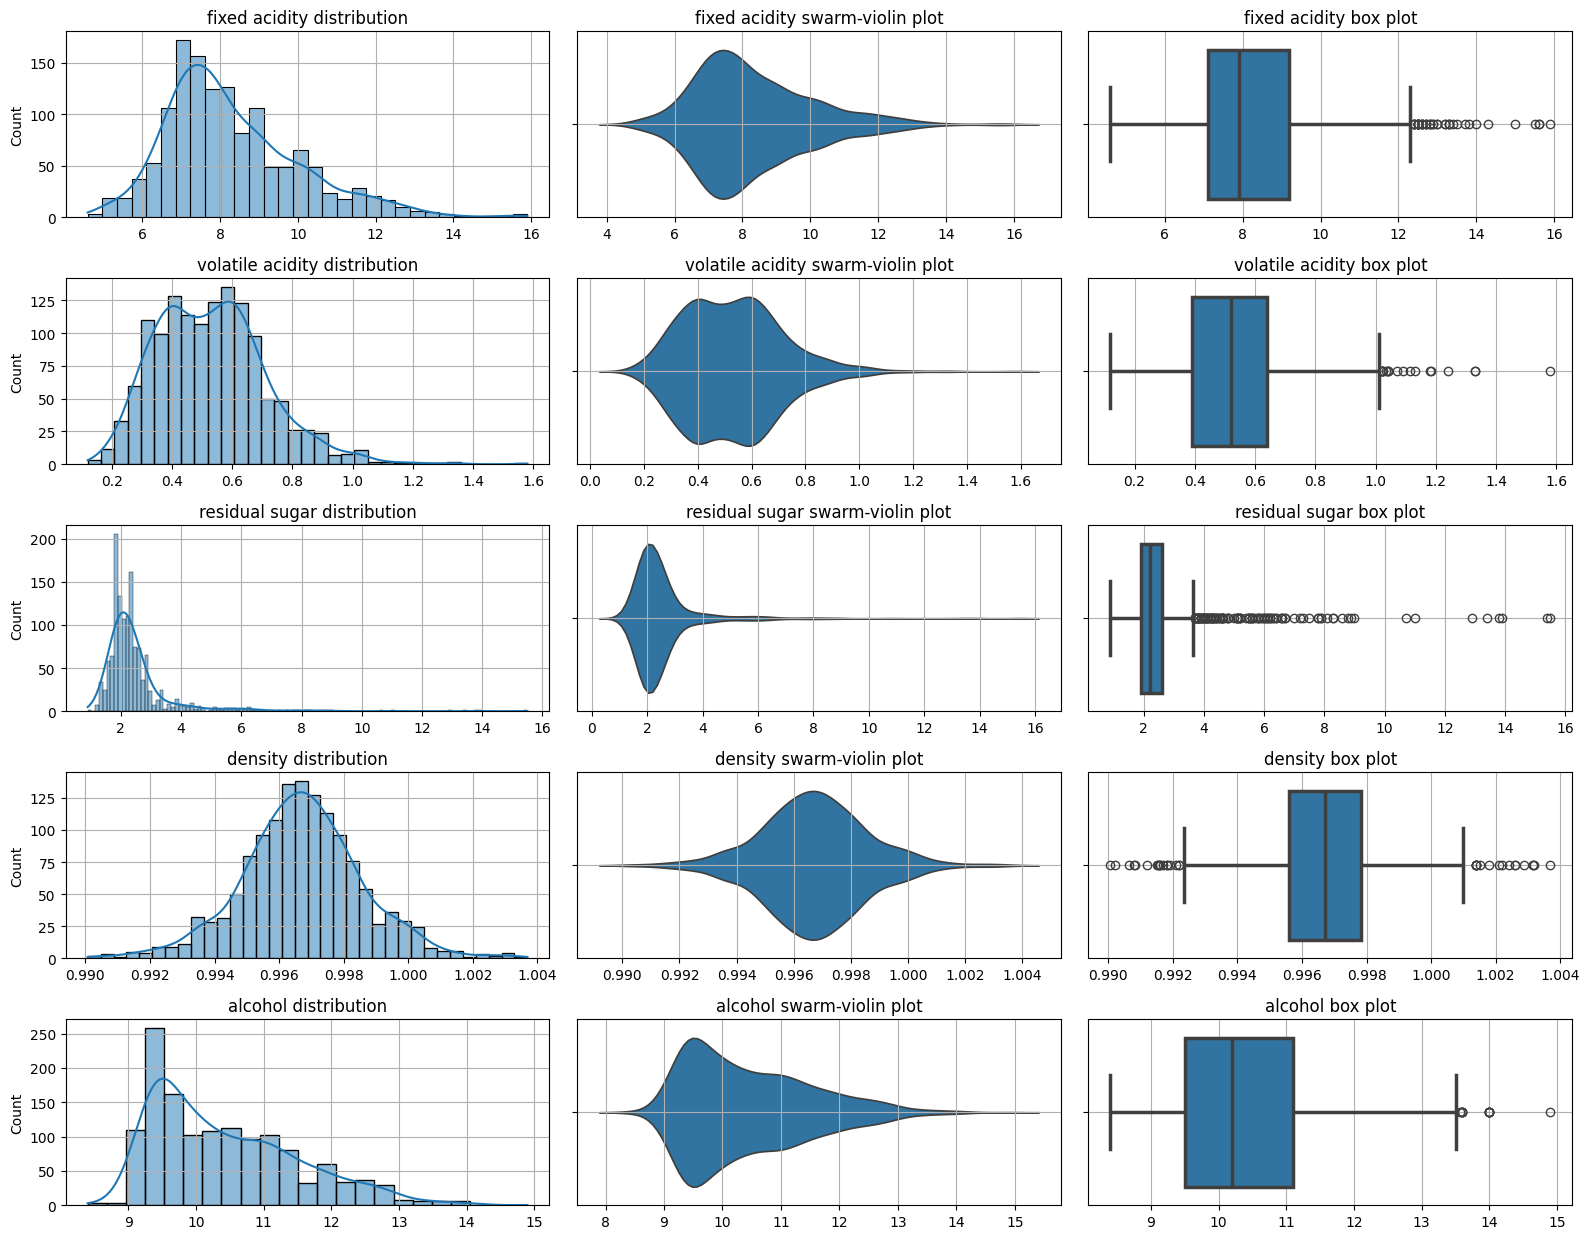

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
nums = df_num.columns
rows = len(nums)
cols = 3

# Create a figure with a specified size
fig = plt.figure(1, (16, rows * 2.5))

# Size of the markers
marker_size = 3

# Whether to use stripplot instead of swarmplot
use_stripplot = False

i = 0
# Iterate through each numerical column
for col in nums:
    i += 1
    # Create a subplot for the histogram
    ax1 = plt.subplot(rows, cols, i)
    sns.histplot(df_num[col], ax=ax1, kde=True)
    # Remove the x-axis label for a cleaner look
    ax1.set_xlabel(None)
    # Set the title of the histogram subplot
    ax1.set_title(f'{col} distribution')
    # Turn on the grid for better readability
    ax1.grid(True)
    # Adjust the layout to prevent overlapping elements
    plt.tight_layout()

    i += 1
    # Create a subplot for the violin plot
    ax2 = plt.subplot(rows, cols, i)
    sns.violinplot(x=df_num[col], ax=ax2, inner=None)

    # Remove the x-axis label for a cleaner look
    ax2.set_xlabel(None)
    # Set the title of the violin plot subplot
    ax2.set_title(f'{col} {"strip" if use_stripplot else "swarm"}-violin plot')
    # Turn on the grid for better readability
    ax2.grid(True)
    # Adjust the layout to prevent overlapping elements
    plt.tight_layout()

    i += 1
    # Create a subplot for the box plot
    ax3 = plt.subplot(rows, cols, i)
    sns.boxplot(x=df_num[col], ax=ax3, orient='h', linewidth=2.5)
    # Remove the x-axis label for a cleaner look
    ax3.set_xlabel(None)
    # Set the title of the box plot subplot
    ax3.set_title(f'{col} box plot')
    # Turn on the grid for better readability
    ax3.grid(True)
    # Adjust the layout to prevent overlapping elements
    plt.tight_layout()

# Display the plot
plt.show()


### Insights
* The distributions of `fixed acidity`, `residual sugar`, and `alcohol` seem to be right-skewed Gaussian.
* `volatile acidity` seems to be multimodal (a mix of two Gaussians).
* The distribution of `density` is Gaussian.
* The outliers detected by the box plot are probably caused by the imbalance of `good wine` vs. `bad wine`. As the plan is to balance the dataset using SMOTE, we are not going to inspect the outliers further.


**Now we analyze relationship between different numerical attributes**

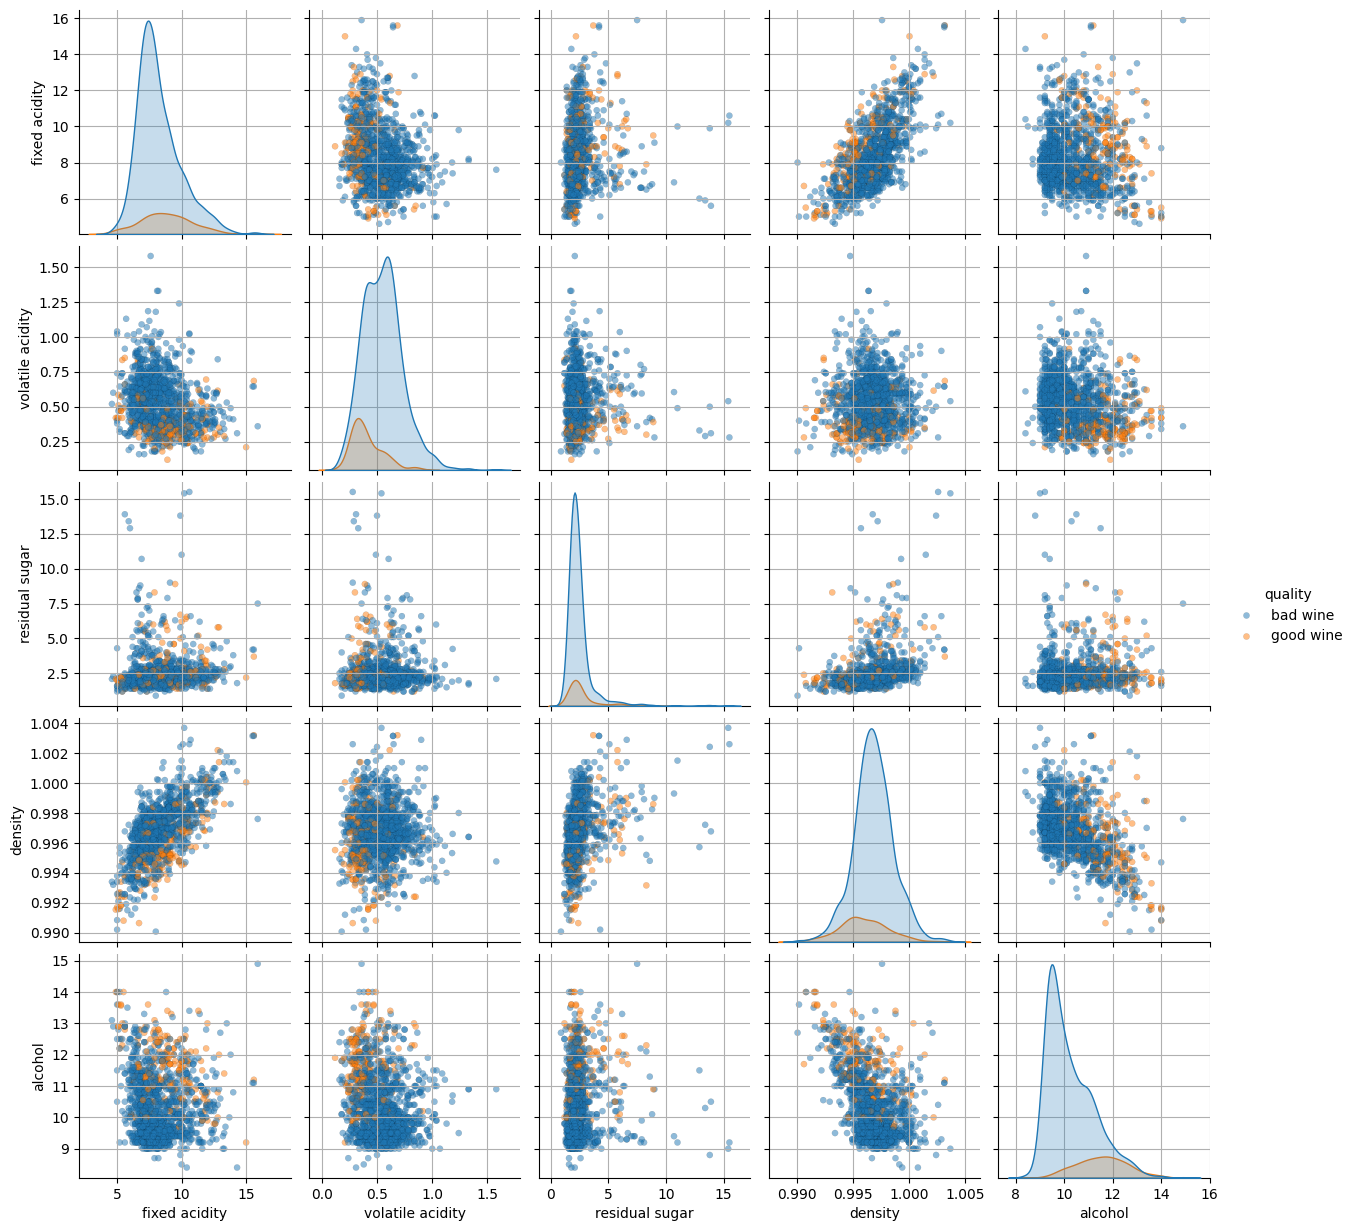

In [25]:
nums = df_num.columns

# Create a pairplot
g = sns.pairplot(
    data=df,
    vars=nums,
    diag_kind='kde',
    hue='quality',
    plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5),
    diag_kws=dict(fill=True)  # Replace shade=True with fill=True
)

# Iterate through each Axes in the PairGrid
for ax in g.axes.flatten():
    ax.grid(True)  # Turn on the grid for each Axes

# Display the plot
plt.show()


### Insights
* `density` and `fixed acidity` seem positively correlated.
* `alcohol` and `density` seem to be negatively correlated.
* There are no other notable relationships visible from the scatter plots.

The insights from numerical values separated by categories will be examined more clearly in the next sections.

## Analysis of categorical vs. numerical variables

### Tasks

1. Work with the original dataset (containing both categorical and numeric variables).
2. Explore the relationship between categorical variables and numeric variables:
   * Create box plots of categorical vs. numerical variables for each variable (use `sns.boxenplot()`).
3. (Optional) Create a violin plot of categorical vs. numerical variables for each variable (use `sns.violinplot()`).
4. Create a line plot of `quality` vs. individual numerical variables.
5. Describe what you found from the plots in tasks 2, 3, and 4.


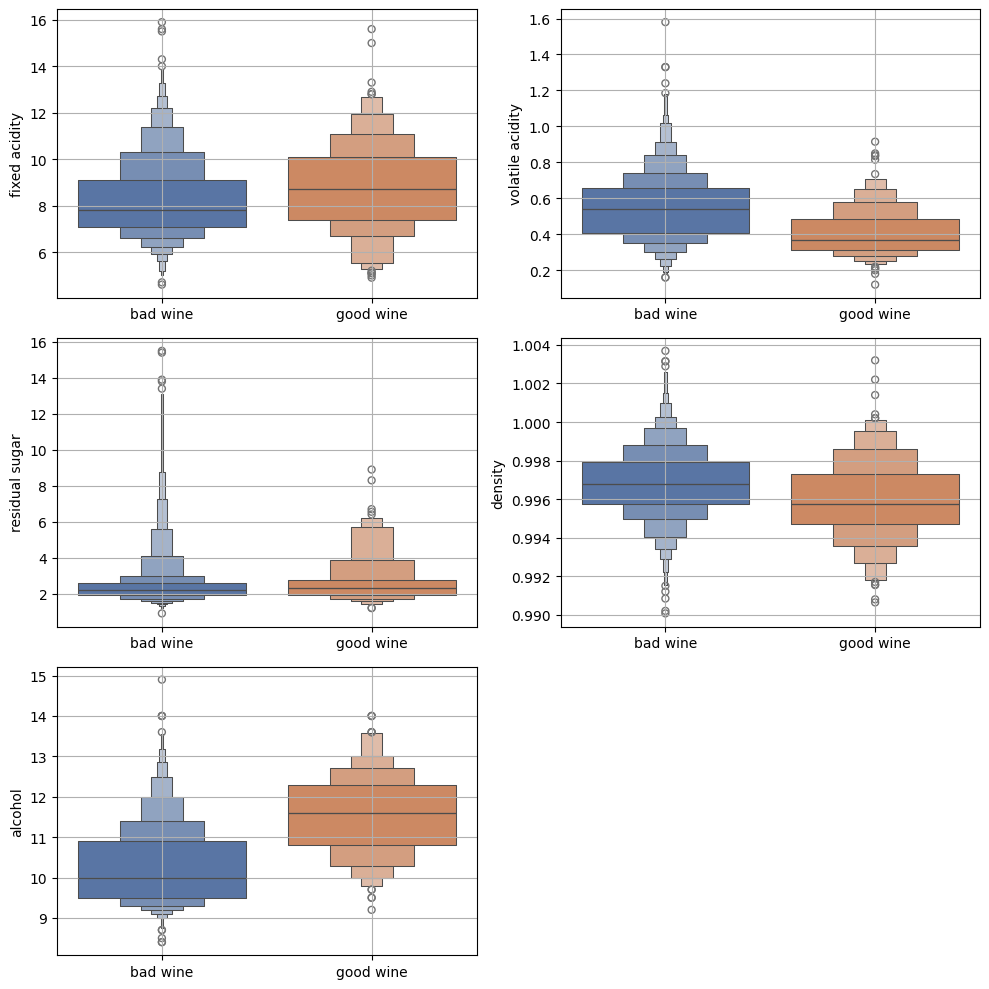

In [26]:
# Variation of numerical features with quality

# Create a figure with a specified size
fig = plt.figure(1, (10, 10))

# Iterate through the numerical columns
for idx, col in enumerate(nums):
    # Create a subplot for each numerical column in a 3x2 grid
    ax = plt.subplot(3, 2, idx + 1)
    # Create a boxen plot for the column, grouped by 'quality'
    sns.boxenplot(x='quality', y=col, data=df, hue='quality', palette=palette, legend=False)
    # Remove the x-axis label for a cleaner look
    ax.set_xlabel(None)
    # Turn on the grid for better readability
    ax.grid(True)
    # Adjust the layout to prevent overlapping elements
    plt.tight_layout()

# Display the plot
plt.show()


### Insights
* `Good wine` seems to have lower `volatile acidity` than `bad wine`.
* `Bad wine` has lower `alcohol` content than `good wine`.
* Insights from other numerical variables are inconclusive.


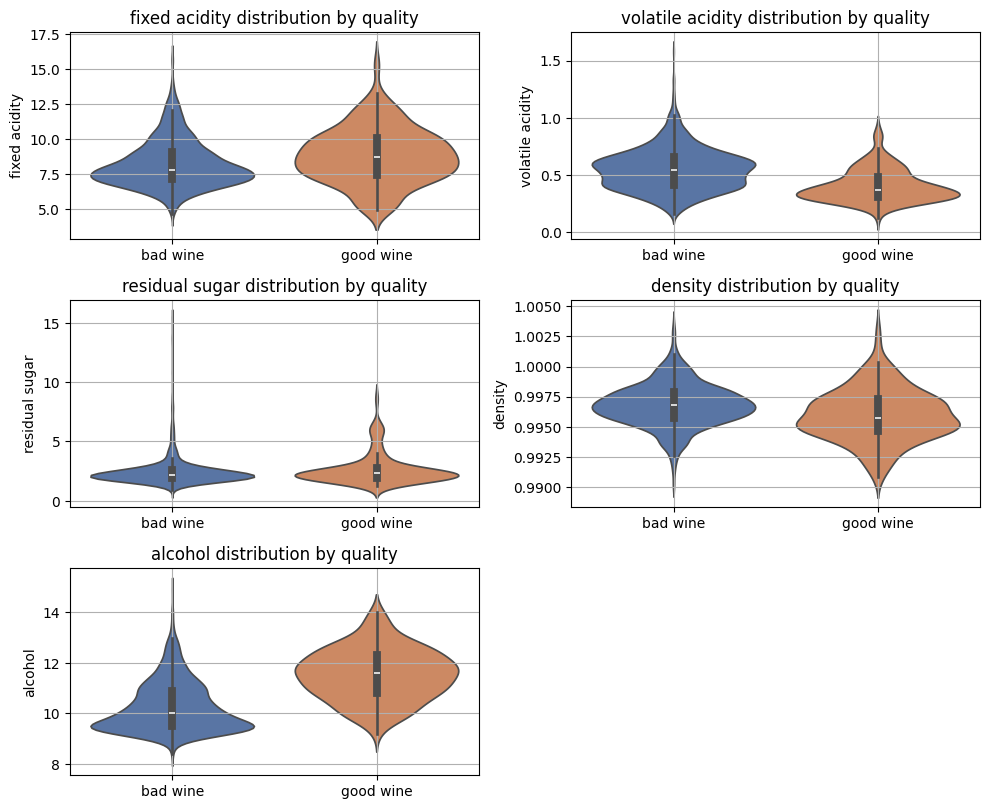

In [27]:
# Variation of numerical features with quality

# Create a figure with a specified size
fig = plt.figure(1, (10, 16))

# Iterate through the numerical columns
for idx, col in enumerate(nums):
    # Create a subplot for each numerical column in a 6x2 grid
    ax = plt.subplot(6, 2, idx + 1)
    # Create a violin plot for the column, grouped by 'quality'
    sns.violinplot(x='quality', y=col, data=df, hue='quality', palette=palette, dodge=False, legend=False)
    # Remove the x-axis label for a cleaner look
    ax.set_xlabel(None)
    # Turn on the grid for better readability
    ax.grid(True)  # Turn on the grid for each subplot
    # Set the title for each subplot
    ax.set_title(f'{col} distribution by quality')
    # Adjust the layout to prevent overlapping elements
    plt.tight_layout()

# Display the plot
plt.show()


### Insights

* Difference in the distributions of `alcohol` for `good wine` and `bad wine` supports that `good wine` has higher alcohol content.


# Prediction model

In this section, you are going to train the perceptron model.

The dataset is going to be split into two parts:
1. **Train dataset** - This is the dataset on which the model is going to be trained.
2. **Test dataset** - This is the set of data which the model 'has not seen yet' and it is used to test how well the model predicts wine `quality` with new data.

The splitting is done randomly assigning data to Train and Test datasets. The split is as follows:
1. 80% is assigned to the Train dataset.
2. 20% is assigned to the Test dataset.

On each iteration, Accuracy Score is calculated.

**Accuracy Score** is defined as the ratio of the number of correct predictions to the total number of predictions made.

Mathematically, it is given by:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

So if the accuracy is 1, this means that the model predicts the values exactly. In reality, accuracy = 1 is not achievable, so our goal is to have accuracy as high as possible.

## Dependent variable imbalance

We also need to handle the imbalance dependent variable `quality` using the **Synthetic Minority Over-sampling Technique** (SMOTE).

Imbalanced datasets occur when the number of instances in one class significantly outnumbers the instances in another class. This imbalance can lead to biased models that perform poorly on the smaller class. To address this issue, we use SMOTE to oversample the smaller class.

**SMOTE** works by generating synthetic examples for the smaller class. It does this by selecting an instance from the smaller class and finding its k-nearest neighbors (5 closest observations). New synthetic example is then created which is similar to it's neighbors.


### Tasks

Create a perceptron based on the variables in the dataset for prediction of `quality` based on all other variables.

1. Separate the dependent and independent variables:
   * Name the independent variables dataframe `X`.
   * Name the dependent variable `Y`.
2. Convert any categorical variable to `int`.
3. In the analysis of the categorical variable, we found out that the `quality` variable is highly imbalanced. Use the following code to alleviate the issue:
```python
from imblearn.over_sampling import SMOTE
# Initialize SMOTE with 5 nearest neighbors
oversample = SMOTE(k_neighbors=5)
# Fit and resample the dataset
X_ros, y_ros = oversample.fit_resample(X, Y)


  4. Create a Train-Test split of the data with the Test dataset being 20% of the data.

  ```python
  from sklearn.model_selection import train_test_split

  # Create Train-Test split
  X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed)


5. Preprocess the independent variables dataset (both Train and Test).

6. Fit the perceptron model to the Train data and evaluate the accuracy on the Test data.


### Hints

1. Convert `bad wine` to 0 and `good wine` to 1.
2. You can use `StandardScaler()` for data preprocessing.
3. For accuracy testing, you can use `accuracy_score(y_test, y_pred)`.


In [28]:
# Function to convert categorical variable 'quality' to integer
def categorize_quality(x):
    """
    Categorizes the quality of wine into integer values.

    Parameters:
    x (str): The quality category of the wine, expected to be 'bad wine' or 'good wine'.

    Returns:
    int: 0 if the wine is categorized as 'bad wine'.
    int: 1 if the wine is categorized as 'good wine'.
    int: Returns the original value if it does not match 'bad wine' or 'good wine'.)
      This is primaraly so if we run the function after modification of the column,
      it does not change the values.
    """
    if x == 'bad wine':
        return 0  # Return 0 for 'bad wine'
    elif x == 'good wine':
        return 1  # Return 1 for 'good wine'
    else:
        return x  # Return the original value if it doesn't match 'bad wine' or 'good wine'

# Apply the categorize_quality function to the 'quality' column in the DataFrame
df['quality'] = df['quality'].apply(categorize_quality)


In [29]:
# Create feature matrix X by dropping the 'quality' column from the DataFrame
X = df.drop(['quality'], axis=1)

# Create target vector y by selecting the 'quality' column from the DataFrame
y = df.quality

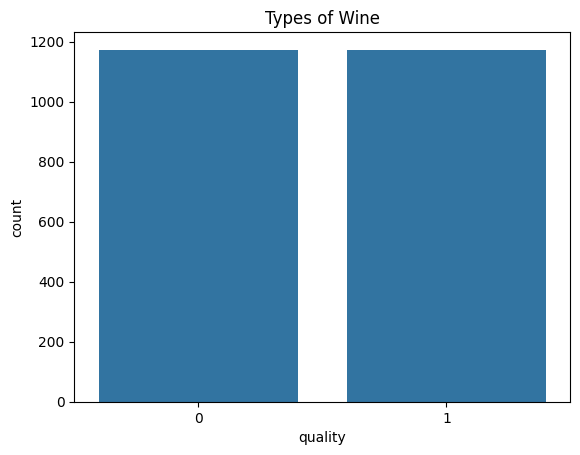

In [30]:
# Import SMOTE (Synthetic Minority Over-sampling Technique) from the imbalanced-learn library
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object with k_neighbors set to 5
oversample = SMOTE(k_neighbors=5)

# Apply SMOTE to the feature matrix X and target vector y
# This will generate synthetic samples to balance the classes
X_ros, y_ros = oversample.fit_resample(X, y)

# Plot the count of each class in the resampled target vector y_ros as a test if
# resampling functions as intended
sns.countplot(x=y_ros)
plt.title("Types of Wine")
plt.show()

# Testing with no SMOTE (uncomment these lines to use the original data without SMOTE)
# X_ros = X
# y_ros = y


In [31]:
# See the first values of the dataframe to test if the dataframe was not changed
# in an undesirable way
X_ros.head()

,fixed acidity,volatile acidity,residual sugar,density,alcohol
0,7.4,0.70,1.9,0.9978,9.4
1,7.8,0.88,2.6,0.9968,9.8
2,7.8,0.76,2.3,0.9970,9.8
3,11.2,0.28,1.9,0.9980,9.8
4,7.4,0.66,1.8,0.9978,9.4


In [32]:
# Seed for random generator for reproducibility of the results
seed = 5

# randomly split dataset to train and test subsets
# use test size of 20% of the data proportion
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed)

In [33]:
# Preprocess the data
scaler = StandardScaler()

# fit to data training
scaler.fit(X_train)

# transform
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Perceptron Classifier


Accuracy: 0.73


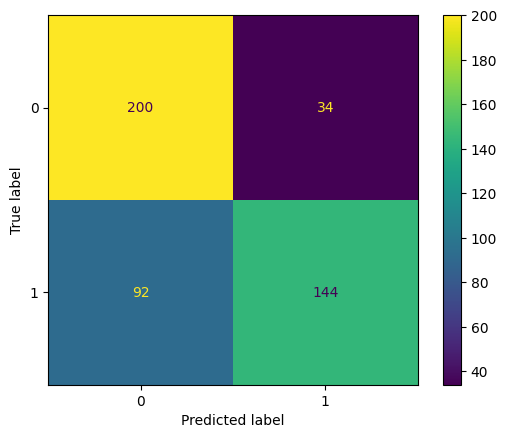

In [34]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

# Define the learning rate for the perceptron
learning_rate = 0.4

# Define the number of iterations for the perceptron
perceptron_iter_num = 1000

# Create a perceptron classifier
# eta0 is the learning rate
# max_iter is the maximum number of iterations (epochs)
# random_state ensures reproducibility
clf = Perceptron(eta0=learning_rate, max_iter=perceptron_iter_num, random_state=seed)

# Train the perceptron classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test data using the trained classifier
y_pred_perceptron = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred_perceptron)
print(f'Accuracy: {accuracy:.2f}')

# Calculate the confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_pred_perceptron)

# Display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()


The accuracy of the Perceptron is pretty good, but other models could fare better.

## Decision tree Classifier


Accuracy: 0.85


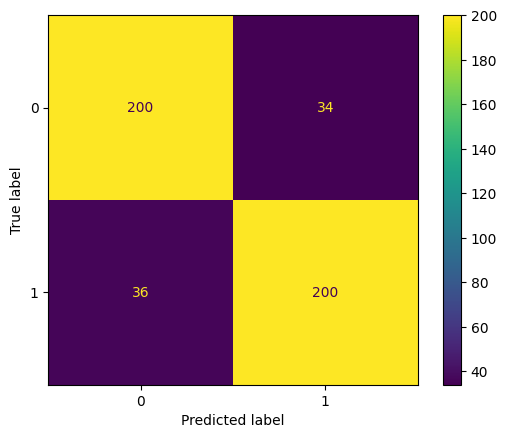

In [35]:
# Initialize the DecisionTreeClassifier with a random seed
dtc = DecisionTreeClassifier(random_state=seed)

# Fit the classifier on the training data
dtc.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dtc.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy:.2f}')

# Calculate the confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()


## Random forest classifier

Random Forest Accuracy: 0.87


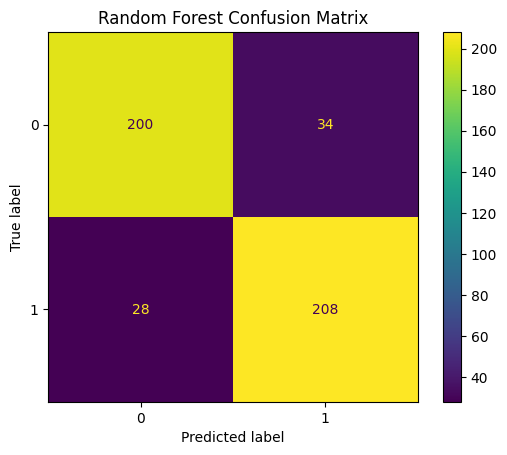

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

# Parameters
n_trees = 10

# Initialize the RandomForestClassifier with a random seed
rfc = RandomForestClassifier(
    n_estimators=n_trees,  # Reducing the number of trees
    max_depth=10,  # Limiting the depth of each tree
    max_features='sqrt',  # Using a smaller subset of features
    n_jobs=-1,  # Parallelize using all available cores
    random_state=seed
)

# Fit the classifier on the training data
rfc.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rfc.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy:.2f}')

# Calculate the confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()


## Testing model accuracy

## DO NOT MODIFY THIS CODE!!!

Just run it after you are finished with the previous sections.


In this section, the model you trained above is going to be evaluated using repeated random Train-Test dataset splitting.

The splitting is done 1000 times, randomly assigning data to Train and Test datasets. The split is as follows:
1. 80% is assigned to the Train dataset.
2. 20% is assigned to the Test dataset.

On each iteration, Accuracy Score is calculated.



### Tasks

Run the code below and describe the results.

How good is our model for the prediction of `quality` based on other variables?
i.e. How accurate is your model in predicting the `quality`?


### Hints

It is crucial to name the independent variables dataset as `X_ros` and the dependent variable as `y_ros` for the code below to function.


## Perceptron Classifier


Min. Accuracy Score: 0.4276595744680851
Max. Accuracy Score: 0.8531914893617021
Mean Accuracy Score: 0.6934659574468085
Median Accuracy Score: 0.7361702127659574
Variance Accuracy Score: 0.01180830427077145


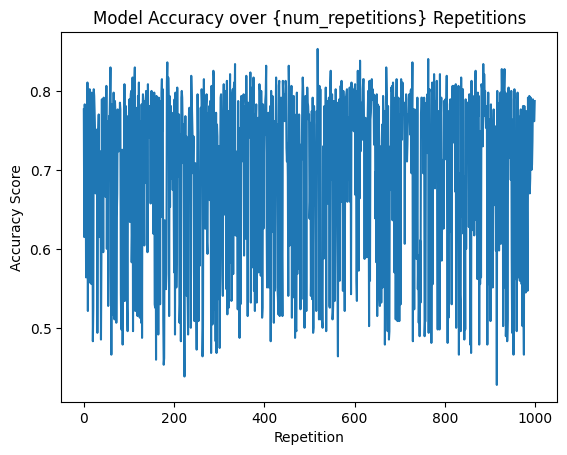

In [37]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Store accuracy scores
accuracy_scores = []

# Define number of repetitions
num_repetitions = 1000

# Repeated train-test split
for repetition in range(num_repetitions):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed + repetition)

    # Create a perceptron classifier
    clf = Perceptron(eta0=learning_rate, max_iter=perceptron_iter_num, random_state=seed)  # eta0 is learning rate

    # Train the perceptron classifier
    clf.fit(X_train, y_train)

    # Predict on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy score on the testing set
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the results
print("Min. Accuracy Score:", min(accuracy_scores))
print("Max. Accuracy Score:", max(accuracy_scores))
print("Mean Accuracy Score:", statistics.mean(accuracy_scores))
print("Median Accuracy Score:", statistics.median(accuracy_scores))
print("Variance Accuracy Score:", statistics.variance(accuracy_scores))

# Plot the accuracy scores
plt.plot(range(num_repetitions), accuracy_scores)
plt.xlabel('Repetition')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy over {num_repetitions} Repetitions')
plt.show()


The model's accuracy is quite dependent on the specific train-test split because the variance of accuracy value is high. This means it may not be reliable enough as a classifier.

## Decision tree Classifier


Min. Accuracy Score: 0.8042553191489362
Max. Accuracy Score: 0.902127659574468
Mean Accuracy Score: 0.8550468085106383
Median Accuracy Score: 0.8553191489361702
Variance Accuracy Score: 0.00026387463062881803


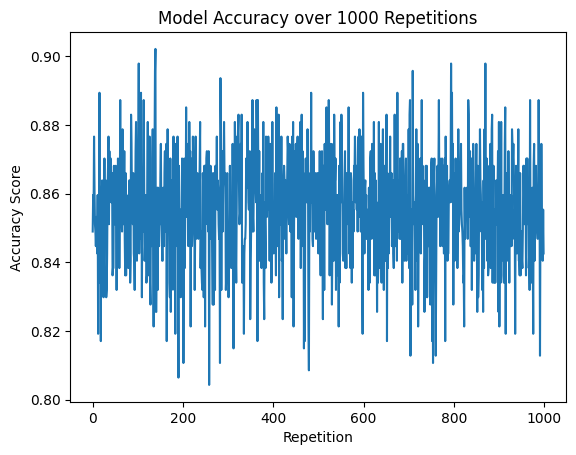

In [38]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Parameters
num_repetitions = 1000

# Store accuracy scores
accuracy_scores = []


# Repeated train-test split
for repetition in range(num_repetitions):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed + repetition)

    # Create Decision tree classifier
    dtc = DecisionTreeClassifier(random_state=seed)

    # Fit the classifier on the training data
    dtc.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = dtc.predict(X_test)

    # Calculate accuracy score on the testing set
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the results
print("Min. Accuracy Score:", min(accuracy_scores))
print("Max. Accuracy Score:", max(accuracy_scores))
print("Mean Accuracy Score:", statistics.mean(accuracy_scores))
print("Median Accuracy Score:", statistics.median(accuracy_scores))
print("Variance Accuracy Score:", statistics.variance(accuracy_scores))

# Plot the accuracy scores
plt.plot(range(num_repetitions), accuracy_scores)
plt.xlabel('Repetition')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy over 1000 Repetitions')
plt.show()


The model is much better than perceptron in terms of not being dependent on the Train-Test split (lower variance). Also summary statistics are much better.

# Random forest Classifier

Min. Accuracy Score: 0.825531914893617
Max. Accuracy Score: 0.9191489361702128
Mean Accuracy Score: 0.8790255319148936
Median Accuracy Score: 0.8787234042553191
Variance Accuracy Score: 0.00020568253178484045


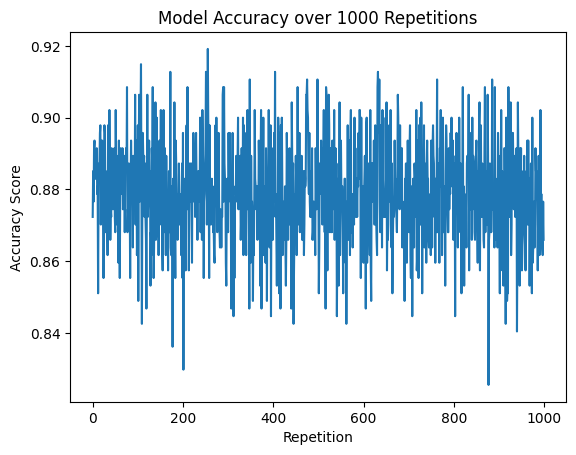

In [39]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Parameters
num_repetitions = 1000
n_trees = 10

# Store accuracy scores
accuracy_scores = []

# Repeated train-test split
for repetition in range(num_repetitions):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed + repetition)

    # Create Random Forest classifier with optimized parameters
    rfc = RandomForestClassifier(
        n_estimators=n_trees,  # Reducing the number of trees
        max_depth=10,  # Limiting the depth of each tree
        max_features='sqrt',  # Using a smaller subset of features
        n_jobs=-1,  # Parallelize using all available cores
        random_state=seed
    )

    # Fit the classifier on the training data
    rfc.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = rfc.predict(X_test)

    # Calculate accuracy score on the testing set
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the results
print("Min. Accuracy Score:", min(accuracy_scores))
print("Max. Accuracy Score:", max(accuracy_scores))
print("Mean Accuracy Score:", statistics.mean(accuracy_scores))
print("Median Accuracy Score:", statistics.median(accuracy_scores))
print("Variance Accuracy Score:", statistics.variance(accuracy_scores))

# Plot the accuracy scores
plt.plot(range(num_repetitions), accuracy_scores)
plt.xlabel('Repetition')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy over 1000 Repetitions')
plt.show()


<div style="font-style: italic; font-size: 14px;">
    <p>This material was prepared by Department of Information Engineering (<a href="https://www.pef.czu.cz/en">PEF ČZU</a>) exclusively for purposes of ELLS summer school "Practical Introduction into Programming with Python". Any distribution or reproduction of this material, in whole or in part, without prior written consent of the authors is prohibited.</p>
    <p>This material is shared under the <b>Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International Public License</b>, <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link</a>.</p>
</div>
